In [58]:
import numpy as np
import os
from os import listdir
from os.path import isfile,join
from os import walk
import matplotlib.pyplot as plt
import random
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as ticker  

In [59]:
cwd = os.getcwd()
dat = os.path.join(cwd, 'dat')
# dat_in = os.path.join(cwd, 'dat_indicator')
subfolders = [ f.name for f in os.scandir(dat) if f.is_dir() ]
subfolders 

['RandomGuess_SVC',
 'RandomGuess_LR_SVC',
 'RandomGuess_XGB',
 'XGB',
 'RandomGuess_XGB_RandomForest_SVC',
 'RandomGuess_XGB_LR',
 'XGB_LR',
 'RandomForest_LR',
 'RandomGuess_LR',
 'XGB_RandomForest_LR',
 'XGB_RandomForest',
 'RandomForest_SVC',
 'RandomGuess_XGB_RandomForest',
 'RandomGuess_XGB_SVC',
 'RandomGuess_XGB_RandomForest_LR_SVC',
 'XGB_SVC',
 'LR_SVC',
 'XGB_RandomForest_SVC',
 'RandomGuess_RandomForest_SVC',
 'RandomForest_LR_SVC',
 'XGB_LR_SVC',
 'RandomGuess_XGB_LR_SVC',
 'RandomGuess_RandomForest_LR',
 'RandomGuess_RandomForest_LR_SVC',
 'RandomGuess_RandomForest',
 'XGB_RandomForest_LR_SVC',
 'RandomGuess_XGB_RandomForest_LR']

In [35]:
data_path = os.path.join(dat, subfolders[0],'average_cumulative_regret.dat')
data_arr =  np.loadtxt(data_path,delimiter='|',usecols = range(3))
num_patients = len(data_arr)
# num_patients

In [60]:
#data = np.zeros(shape=(len(subfolders),num_patients,3))  
# regrets = pd.DataFrame() 
# avg_regret_list = []
# expertcom_list = []
# round_list = []
#round_list = [10, 50, 100, 200, 500, 1000, 1500 ,2000]
round_10 =  []
round_50 = []
round_100 =  []
round_200 = []
round_500 =  []
round_1000 =  []
round_1500 =  []
round_2000 = []
# round_col = []
header = "experts, round = 10, round = 50 , round = 100, round = 200, round = 500, round = 1000, round = 1500, round = 2000"
experts_col = []

In [61]:
for i, f in enumerate(subfolders):
    experts = f.split('_')
    experts_col.append("+".join(experts))
    #if 'SVC' in experts and 'RF' in experts and len(experts)==2:    
    data_path = os.path.join(dat, f,'average_cumulative_regret.dat')
    data  = np.loadtxt(data_path, delimiter='|', usecols = range(3)  ) 
    if data.shape[0] !=2500:
        print(f)
        continue
    round_10.append( data[10][1] )
    round_50.append(  data[50][1] )
    round_100.append(  data[100][1] )
    round_200.append( data[200][1]  )
    round_500.append( data[500][1] )
    round_1000.append( data[1000][1]  )
    round_1500.append(  data[1500][1]   )
    round_2000.append(   data[2000][1]  )
#     round_10.append(round(data[10][1],4)  )
#     round_50.append( round(data[50][1],4) )
#     round_100.append(round( data[100][1],4) )
#     round_200.append(round(data[200][1],4) )
#     round_500.append(round( data[500][1],4) )
#     round_1000.append( round(data[1000][1],4) )
#     round_1500.append( round(data[1500][1],4) )
#     round_2000.append( round(data[2000][1],4) )

r_data = np.column_stack((experts_col, round_10 , round_50,round_100, round_200,round_500,round_1000, round_1500,round_2000 ))
np.savetxt(os.path.join(dat,'avg_regret_all_experts.dat'), r_data, fmt="%s", delimiter='&', header=header)

 

In [62]:
round_10 =  []
round_50 = []
round_100 =  []
round_200 = []
round_500 =  []
round_1000 =  []
round_1500 =  []
round_2000 = []
experts_col = []

In [63]:
for i, f in enumerate(subfolders):
    experts = f.split('_')
    experts_col.append("+".join(experts))
    #if 'SVC' in experts and 'RF' in experts and len(experts)==2:    
    data_path = os.path.join(dat, f,'average_cumulative_regret.dat')
    data  = np.loadtxt(data_path, delimiter='|', usecols = range(3)  ) 
    if data.shape[0] !=2500:
        print(f)
        continue
    round_10.append( data[10][2] )
    round_50.append(  data[50][2] )
    round_100.append(  data[100][2] )
    round_200.append( data[200][2]  )
    round_500.append( data[500][2] )
    round_1000.append( data[1000][2]  )
    round_1500.append(  data[1500][2]   )
    round_2000.append(   data[2000][2]  )
#     round_10.append( round(data[10][2],4))
#     round_50.append( round(data[50][2],4))
#     round_100.append( round(data[100][2],4))
#     round_200.append(round(data[200][2] ,4))
#     round_500.append(round(data[500][2],4 ))
#     round_1000.append(round(data[1000][2],4) )
#     round_1500.append(round(data[1500][2],4)  )
#     round_2000.append( round( data[2000][2],4))

r_data = np.column_stack((experts_col, round_10 , round_50,round_100, round_200,round_500,round_1000, round_1500,round_2000 ))
np.savetxt(os.path.join(dat,'cul_regret_all_experts.dat'), r_data, fmt="%s", delimiter='&', header=header)


In [45]:
#data = np.zeros(shape=(len(subfolders),num_patients,3))  
regrets = pd.DataFrame() 
avg_regret_list = []
expertcom_list = []
round_list = []

In [46]:
for i, f in enumerate(subfolders):
    #calculate the average regret of xgb
 
    if ('_' not in f) and ('XGB' in experts):  
        
        xgb_path = os.path.join(dat, f,'average_cumulative_regret.dat')
        xgb_data  = np.loadtxt(data_path, delimiter='|', usecols = range(3)  ) 
        for r in range(num_patients): 
            expertcom_list.append('XGB')   
            round_list.append(r)
            avg_regret_list.append(xgb_data[r,1])  
#         print(regrets.shape)

    else:
        experts = f.split('_')
        expert_com = "+".join(experts)
        data_path = os.path.join(dat, f,'average_cumulative_regret.dat')
        data  = np.loadtxt(data_path, delimiter='|', usecols = range(3)  ) 
        if data.shape[0] !=2500:
            print(f)
            continue


        for r in range(num_patients): 
            expertcom_list.append(expert_com)   
            round_list.append(r)
            avg_regret_list.append(data[r,1])
regrets['Experts'] = expertcom_list
regrets['round'] = round_list
regrets['Average Regret'] = avg_regret_list
regrets = regrets.assign(indicator= 'No')

In [51]:
regrets[regrets['Experts']=='XGB']  

,Experts,round,Average Regret,indicator
7500,XGB,0,0.211079,No
7501,XGB,1,0.105540,No
7502,XGB,2,0.070360,No
7503,XGB,3,0.072773,No
7504,XGB,4,0.258218,No
...,...,...,...,...
9995,XGB,2495,0.197317,No
9996,XGB,2496,0.197238,No
9997,XGB,2497,0.197159,No
9998,XGB,2498,0.197080,No


In [12]:
# #data = np.zeros(shape=(len(subfolders),num_patients,3))  
# regrets_in = pd.DataFrame() 
# avg_regret_list_in = []
# expertcom_list_in = []
# round_list_in = []
# for i, f in enumerate(subfolders_in):
#     data_path = os.path.join(dat_in, f,'average_cumulative_regret.dat')
#     data  = np.loadtxt(data_path, delimiter='|', usecols = range(3)  ) 
#     if data.shape[0] !=2500:
#         print(f)
#         continue
#     experts = f.split('_')
#     expert_com = "+".join(experts)
#     for r in range(num_patients): 
#         expertcom_list_in.append(expert_com)   
#         round_list_in.append(r)
#         avg_regret_list_in.append(data[r,1])
# regrets_in['Experts'] = expertcom_list_in
# regrets_in['round'] = round_list_in
# regrets_in['Average Regret'] = avg_regret_list_in
# regrets_in = regrets_in.assign(indicator= 'Yes')

In [11]:
# regrets_in

In [16]:
# svc_lr_rg_regret = pd.DataFrame()
# i4 =0
# i3 = 0
# for i, f in enumerate(subfolders):
#     experts = f.split('_')
#     if ('RandomGuess' not in experts):
#         if ('SVC' in experts) and ('RandomForest' in experts): #and ('RandomGuess' in experts):
#             if len(experts)==2:
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                 continue
#             if len(experts)==3 and i3==0:
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                 i3 = i3+1
#                 continue
#             if len(experts)==4 and i4==0:
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                 i4=i4+1
#                 continue
#             #if len(experts)==5:
#              #   expert_com = "+".join(experts)
#               #  svc_lr_rg_regret =svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                # continue

In [17]:
# svc_lr_rg_regret = pd.DataFrame()
# i4 =0
# i3 = 0
# for i, f in enumerate(subfolders):
#     experts = f.split('_')
#     if ('RandomGuess' not in experts):
#         if ('SVC' in experts) and ('LR' in experts): #and ('RandomGuess' in experts):
#             if len(experts)==2:
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                 continue
#             if len(experts)==3 and i3==0:
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                 i3 = i3+1
#                 continue
#             if len(experts)==4 and i4==0:
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                 i4=i4+1
#                 continue
#             if len(experts)==5:
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret =svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#                 continue

In [18]:
# svc_lr_rg_regret = pd.DataFrame()
# i4 =0
# i3 = 0
# i2=0
# for i, f in enumerate(subfolders):
    
#     experts = f.split('_')
#     if ('RandomGuess' not in experts):
#         if ('SVC' in experts) and ('RandomForest' in experts): #and ('RandomGuess' in experts):
#             if len(experts)==2 and i2==0:
#                 i2=i2+1
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
                
#             if len(experts)==3 and i3==0:
#                 i3=i3+1
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
#             if len(experts)==4 and i4==0:
#                 i4=i4+1
                
#                 expert_com = "+".join(experts)
#                 svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)

In [19]:
# from matplotlib.pyplot import figure
# #title = "Average Regret - SVC&LR"   
# #title = "Average Regret - SVC&RF (XGB vs LR)"  
# #title = "Average Regret - SVC&RF"  
# figure(figsize=(15, 10) )
# sns.set(font_scale=3)
# #plt.xscale("log")
# #plt.yscale("log")

# plt.title(title)
# ax = sns.lineplot(x="round", y="Average Regret", hue="Experts" ,#data=svc_lr_rg_regret)
#                 data=svc_lr_rg_regret )

# #ax.set_xscale("log")
# plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title
# ax.set(ylim=(0, 0.18))
# fig = ax.get_figure() 
# #fig.savefig('./Regret_plots/'+ 'SVC_'+ 'RF_'+'XGBvsLR'+'.eps')
# #fig.savefig('./Regret_plots/'+ 'SVC_' + 'RF_'+'XGBvsLR'+ '.png')
# #fig.savefig('./Regret_plots/'+ 'SVC_'+ 'LR'+'.eps')
# #fig.savefig('./Regret_plots/'+ 'SVC_' + 'LR'+ '.png')
# fig.savefig('./Regret_plots/'+ 'SVC_'+ 'RF'+'.eps')
# fig.savefig('./Regret_plots/'+ 'SVC_' + 'RF'+ '.png')

In [20]:
svc_lr_rg_regret = pd.DataFrame()
i4 =0
i3 = 0
i2=0
for i, f in enumerate(subfolders):
    experts = f.split('_')
    if len(experts)==3:
    #if ('RandomGuess' not in experts):
        if ('SVC' in experts) and ('RandomForest' in experts)  and ('XGB' in experts):  

            expert_com = "+".join(experts)
            svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
        if ('SVC' in experts) and ('RandomForest' in experts)  and ('LR' in experts):  

            expert_com = "+".join(experts)
            svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)                
 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


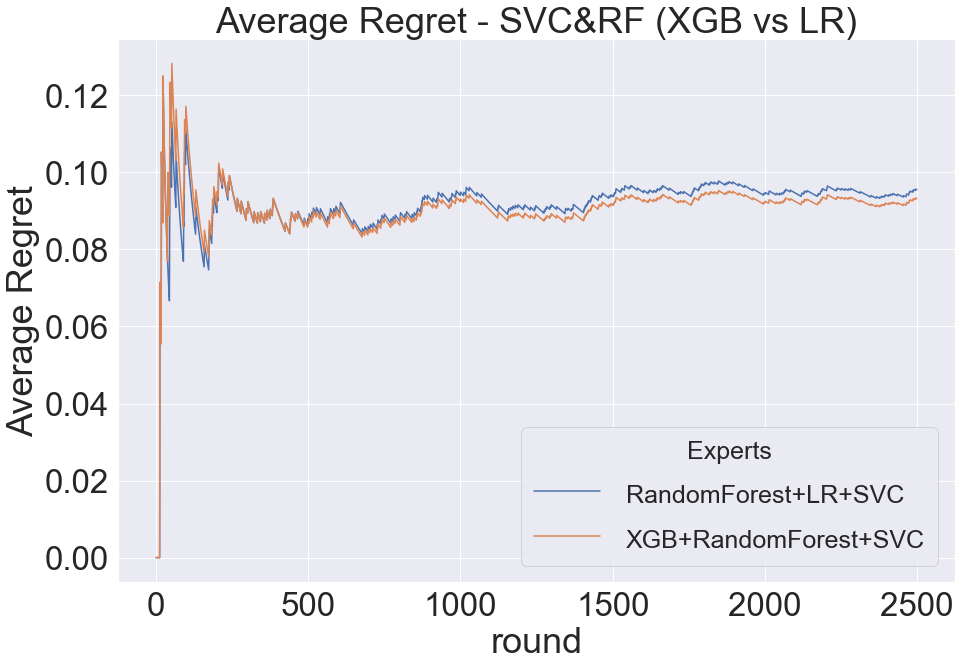

In [21]:
from matplotlib.pyplot import figure
#title = "Average Regret - SVC&LR"   
title = "Average Regret - SVC&RF (XGB vs LR)"  
#title = "Average Regret - SVC&RF"  
figure(figsize=(15, 10) )
sns.set(font_scale=3)
#plt.xscale("log")
#plt.yscale("log")

plt.title(title)
ax = sns.lineplot(x="round", y="Average Regret", hue="Experts" ,#data=svc_lr_rg_regret)
                data=svc_lr_rg_regret )

#ax.set_xscale("log")
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title
#ax.set(xlim=(10, 2500))
fig = ax.get_figure() 
fig.savefig('./Regret_plots/'+ 'SVC_'+ 'RF_'+'XGBvsLR'+'.eps')
fig.savefig('./Regret_plots/'+ 'SVC_' + 'RF_'+'XGBvsLR'+ '.png')
#fig.savefig('./Regret_plots/'+ 'SVC_'+ 'LR'+'.eps')
#fig.savefig('./Regret_plots/'+ 'SVC_' + 'LR'+ '.png')
#fig.savefig('./Regret_plots/'+ 'SVC_'+ 'RF'+'.eps')
#fig.savefig('./Regret_plots/'+ 'SVC_' + 'RF'+ '.png')

In [52]:
xgb_rf_rg_regret = pd.DataFrame()
# xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == 'XGB' ]).reset_index(drop=True)
i4 =0
i3 = 0
i2 = 0
for i, f in enumerate(subfolders):
    experts = f.split('_')
    if ('XGB' in experts) and ('RandomForest' in experts): #and ('RandomGuess' in experts):
        if len(experts)==2 and i2==0:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            i2 = i2+1
            continue
        if len(experts)==3 and i3==0:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            i3 = i3+1
            continue
        if len(experts)==4 and i4==0:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            i4=i4+1
            continue
        if len(experts)==5:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            continue
#         expert_com = "+".join(experts)
#         xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


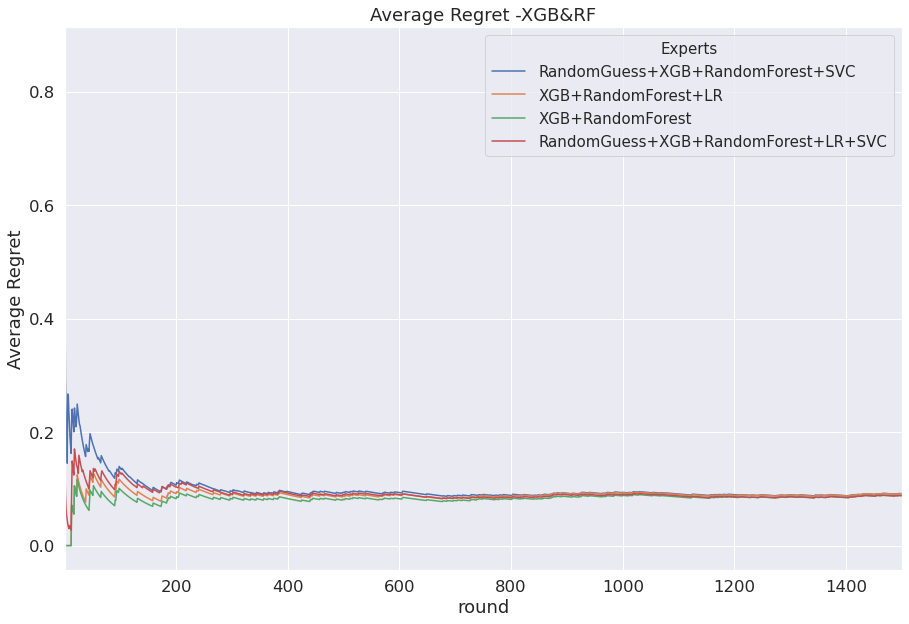

In [53]:
from matplotlib.pyplot import figure
title = "Average Regret -XGB&RF"   
figure(figsize=(15, 10) )
sns.set(font_scale=1.5)
plt.title(title)
ax = sns.lineplot(x="round", y="Average Regret", hue="Experts" ,
                data=xgb_rf_rg_regret[xgb_rf_rg_regret['round']<=1500])
ax.set(xlim=(1, 1500))
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
fig = ax.get_figure() 
fig.savefig('./Regret_plots/'+ 'XGB_'+ 'RF'+'.eps')
fig.savefig('./Regret_plots/'+ 'XGB_'+ 'RF'+'.png')

In [54]:
xgb_rf_rg_regret = pd.DataFrame()
# xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == 'XGB' ]).reset_index(drop=True)

In [56]:
i4 = 0
i3 = 0
i2 = 0
i1 = 0
for i, f in enumerate(subfolders):
    experts = f.split('_')
    if 'XGB' in experts: #and ('RandomGuess' in experts):
        if len(experts)==1 and i1==0:
            #expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == 'XGB']).reset_index(drop=True)
            i1 = i1+1
            continue
        if len(experts)==2 and i2==0:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            i2 = i2+1
            continue
        if len(experts)==3 and i3==0:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            i3 = i3+1
            continue
        if len(experts)==4 and i4==0:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            i4=i4+1
            continue
        if len(experts)==5:
            expert_com = "+".join(experts)
            xgb_rf_rg_regret = xgb_rf_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ]).reset_index(drop=True)
            continue

os.path.join(dat, subfolders[0],'average_cumulative_regret.dat')

'/home/annie/Dropbox (GaTech)/My Files/JBHI_submitted/OnAI-Comp/dat/RandomGuess_SVC/average_cumulative_regret.dat'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


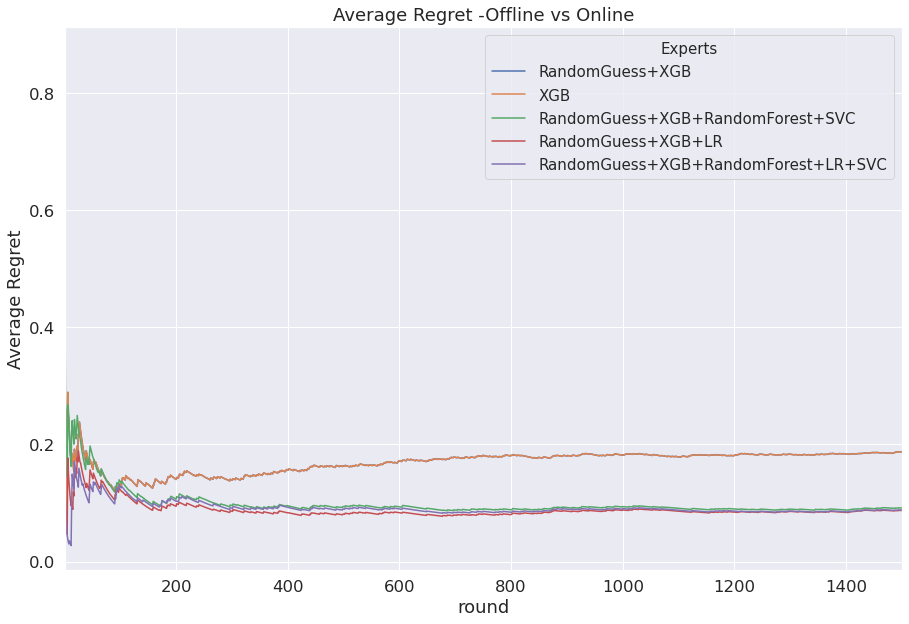

In [57]:
from matplotlib.pyplot import figure
title = "Average Regret -Offline vs Online"   
figure(figsize=(15, 10) )
sns.set(font_scale=1.5)
plt.title(title)
ax = sns.lineplot(x="round", y="Average Regret", hue="Experts" ,
                data=xgb_rf_rg_regret[xgb_rf_rg_regret['round']<=1500])
ax.set(xlim=(1, 1500))
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
fig = ax.get_figure() 
fig.savefig('./Regret_plots/'+ 'XGB_offlineVonline'+'.eps')
fig.savefig('./Regret_plots/'+ 'XGB_offlineVonline'+'.png')

In [272]:
# svc_regret = pd.DataFrame()
# for i, f in enumerate(subfolders):
#     experts = f.split('_')
#     if 'SVC' in experts:
#         expert_com = "+".join(experts)
#         svc_regret = svc_regret.append(regrets.loc[regrets['Experts'] == expert_com ])

In [273]:
# svc_lr_regret = pd.DataFrame()
# for i, f in enumerate(subfolders):
#     experts = f.split('_')
#     if ('SVC' in experts) and ('LR' in experts):
#         expert_com = "+".join(experts)
#         svc_lr_regret = svc_lr_regret.append(regrets.loc[regrets['Experts'] == expert_com ])

In [274]:
# svc_lr_rg_regret = pd.DataFrame()
# for i, f in enumerate(subfolders):
#     experts = f.split('_')
#     if ('SVC' in experts) and ('LR' in experts) and ('RandomGuess' in experts):
#         expert_com = "+".join(experts)
#         svc_lr_rg_regret = svc_lr_rg_regret.append(regrets.loc[regrets['Experts'] == expert_com ])

In [288]:
# indicator_comp_svc_lr_rg.loc[indicator_comp_svc_lr_rg['indicator']==1]

In [196]:
# svc_lr_regret.shape

In [197]:
# svc_lr_rg_regret.shape

In [198]:
# from matplotlib.pyplot import figure
# title = "Average Regret - Including SVC"   
# figure(figsize=(15, 10) )
# sns.set(font_scale=1.5)
# plt.title(title)
# ax = sns.lineplot(x="round", y="Average Regret", hue="Experts" ,
#                 data=svc_regret[svc_regret['round']<=1000])
# plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
# fig = ax.get_figure() 
# fig.savefig('./Regret_plots/'+ 'SVC'+ '.eps')
# fig.savefig('./Regret_plots/'+ 'SVC' + '.png')

In [299]:
# from matplotlib.pyplot import figure
# title = "Average Regret - Including SVC & LR & RG"   
# figure(figsize=(15, 10) )
# sns.set(font_scale=1.5)
# plt.title(title)
# ax = sns.lineplot(x="round", y="Average Regret", hue="Experts" ,
#                 data=svc_lr_rg_regret[svc_lr_rg_regret['round']<=1000])
# plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
# fig = ax.get_figure() 
# fig.savefig('./Regret_plots/'+ 'SVC_'+ 'LR_'+'RG'+'.eps')
# fig.savefig('./Regret_plots/'+ 'SVC_' + 'LR_'+'RG'+ '.png')

In [200]:
# from matplotlib.pyplot import figure
# title = "Average Regret - Including SVC & LR"   
# figure(figsize=(15, 10) )
# sns.set(font_scale=1.5)
# plt.title(title)
# ax = sns.lineplot(x="round", y="Average Regret", hue="Experts" ,
#                 data=svc_lr_regret[svc_lr_regret['round']<=1000])
# plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
# fig = ax.get_figure() 
# fig.savefig('./Regret_plots/'+ 'SVC_'+ 'LR'+'.eps')
# fig.savefig('./Regret_plots/'+ 'SVC_' + 'LR'+'.png')